In [30]:
import glob
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplhep as hep
hep.style.use("CMS")

In [34]:
#MINLOfileNames  = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBBMINLO_noTrig2024Aug12/GluGluHToBB_M-125_TuneCP5_MINLO_NNLOPS_13TeV-powheg-pythia8/crab_GluGluHToBBMINLO_noTrig/240812_091933/0000/*.root")[:10]
#fileNames       = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBB_noTrig2024Aug12/GluGluHToBB_M-125_TuneCP5_13TeV-powheg-pythia8/crab_GluGluHToBB_noTrig/240812_133614/0000/*.root")[:5]

#Passing trigger
MINLOfileNames  = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/MINLOGluGluHToBB/*.root")[:10]
fileNames       = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBB2024Mar05/GluGluHToBB_M-125_TuneCP5_13TeV-powheg-pythia8/crab_GluGluHToBB/240305_081723/0000/*.root")[:10]


In [32]:
Higgs_ptMINLO, Higgs_etaMINLO = [], []

for fN in MINLOfileNames:
    print("Opening %d/%d %s"%(MINLOfileNames.index(fN), len(MINLOfileNames),fN))
    f_MINLO = uproot.open(fN)
    tree = f_MINLO['Events']
    branches = tree.arrays()
    #maxEntries = np.min((tree.num_entries, 20000))
    maxEntries = tree.num_entries
    for ev in range(maxEntries):
        if ev%1000==0:
            print(ev/maxEntries*100)
        GenPart_pt = branches["GenPart_pt"][ev]
        GenPart_eta = branches["GenPart_eta"][ev]
        GenPart_pdgId =  branches["GenPart_pdgId"][ev]
        GenPart_statusFlags =  branches["GenPart_statusFlags"][ev]


        LastHiggs_Mask = (GenPart_pdgId==25) & (GenPart_statusFlags>2**13) & (GenPart_statusFlags<2**14)
        Higgs_ptMINLO.append(GenPart_pt[LastHiggs_Mask][0])
        Higgs_etaMINLO.append(GenPart_eta[LastHiggs_Mask][0])

Opening 0/10 /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBB2024Mar05/GluGluHToBB_M-125_TuneCP5_13TeV-powheg-pythia8/crab_GluGluHToBB/240305_081723/0000/GluGluHToBB_Run2_mc_2024Mar05_110.root
0.0
Opening 1/10 /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBB2024Mar05/GluGluHToBB_M-125_TuneCP5_13TeV-powheg-pythia8/crab_GluGluHToBB/240305_081723/0000/GluGluHToBB_Run2_mc_2024Mar05_90.root
0.0
71.78750897343862
Opening 2/10 /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBB2024Mar05/GluGluHToBB_M-125_TuneCP5_13TeV-powheg-pythia8/crab_GluGluHToBB/240305_081723/0000/GluGluHToBB_Run2_mc_2024Mar05_36.root
0.0
51.867219917012456
Opening 3/10 /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBB2024Mar05/GluGluHToBB_M-125_TuneCP5_13TeV-powheg-pythia8/crab_GluGluHToBB/240305_081723/0000/GluGluHToBB_Run2_mc_2024Mar05_124.root
0.0
63.33122229259025
Opening 4/10 /pnfs/psi.ch/cms/trivc

In [35]:
Higgs_pt, Higgs_eta = [], []

for fN in fileNames:
    print("Opening %s"%fN)
    f = uproot.open(fN)
    tree = f['Events']
    branches = tree.arrays()
    maxEntries = np.min((tree.num_entries, 20000))
    maxEntries = tree.num_entries
    for ev in range(maxEntries):
        if ev%1000==0:
            print(ev/maxEntries*100)
        GenPart_pt          = branches["GenPart_pt"][ev]
        GenPart_eta         = branches["GenPart_eta"][ev]
        GenPart_pdgId       =  branches["GenPart_pdgId"][ev]
        GenPart_statusFlags =  branches["GenPart_statusFlags"][ev]
    
        LastHiggs_Mask = (GenPart_pdgId==25) & (GenPart_statusFlags>2**13) & (GenPart_statusFlags<2**14)
        Higgs_pt.append(GenPart_pt[LastHiggs_Mask][0])
        Higgs_eta.append(GenPart_eta[LastHiggs_Mask][0])

Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBBMINLO_noTrig2024Aug12/GluGluHToBB_M-125_TuneCP5_MINLO_NNLOPS_13TeV-powheg-pythia8/crab_GluGluHToBBMINLO_noTrig/240812_091933/0000/GluGluHToBBMINLO_noTrig_Run2_mc_2024Aug12_5.root
0.0
41.254125412541256
82.50825082508251
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBBMINLO_noTrig2024Aug12/GluGluHToBB_M-125_TuneCP5_MINLO_NNLOPS_13TeV-powheg-pythia8/crab_GluGluHToBBMINLO_noTrig/240812_091933/0000/GluGluHToBBMINLO_noTrig_Run2_mc_2024Aug12_4.root
0.0
20.627062706270628
41.254125412541256
61.88118811881188
82.50825082508251
Opening /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/nanoaod_ggH/GluGluHToBBMINLO_noTrig2024Aug12/GluGluHToBB_M-125_TuneCP5_MINLO_NNLOPS_13TeV-powheg-pythia8/crab_GluGluHToBBMINLO_noTrig/240812_091933/0000/GluGluHToBBMINLO_noTrig_Run2_mc_2024Aug12_57.root
0.0
3.3003300330033
6.6006600660066
9.900990099009901
13.2013201320132
16.50165016

(-5.0, 5.0)

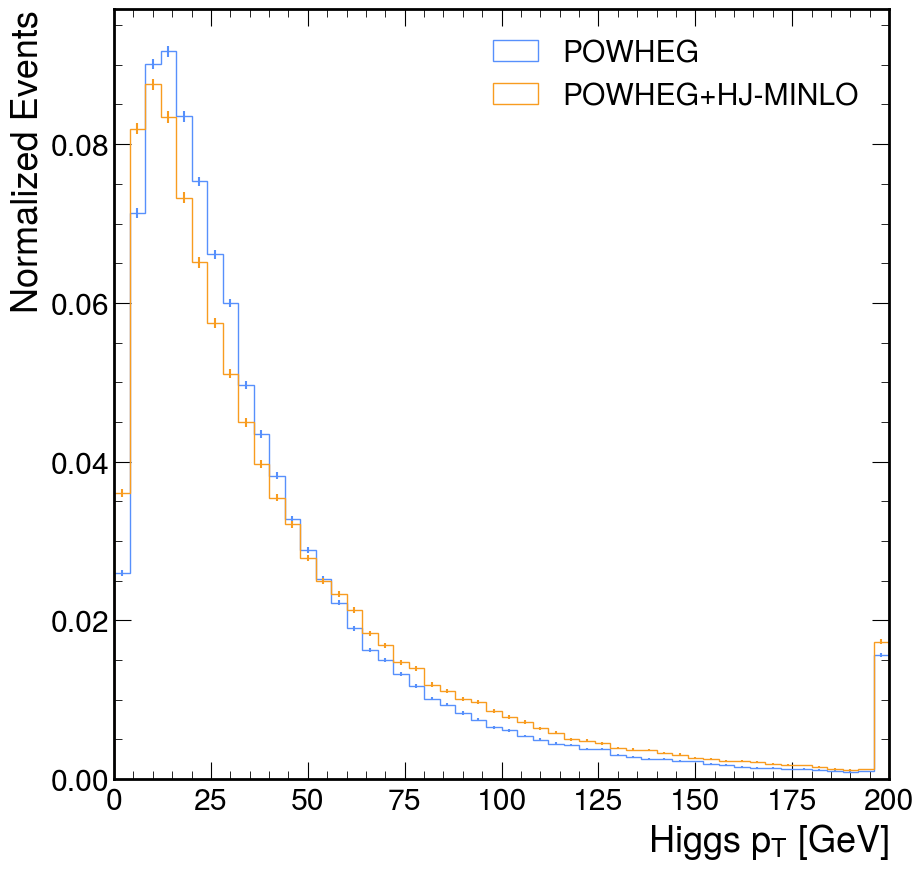

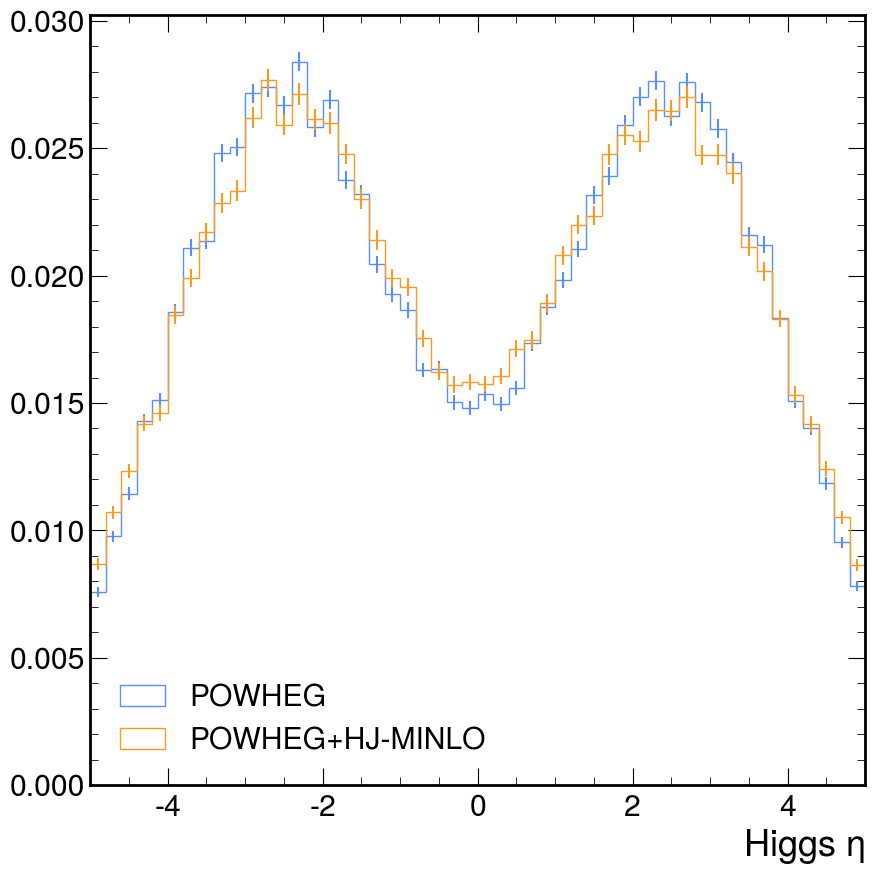

In [ ]:
# Higgs pt
fig, ax = plt.subplots(1, 1)
bins = np.linspace(0, 200, 51)
c = np.histogram(np.clip(Higgs_pt, bins[0], bins[-1]), bins=bins)[0]
cErr = np.sqrt(c)
cErr = cErr/np.sum(c)
c = c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype = u'step', label="POWHEG")
ax.errorbar((bins[:-1] + bins[1:])/2, c, yerr=cErr, color='C0', linestyle='none' )
cMINLO = np.histogram(np.clip(Higgs_ptMINLO, bins[0], bins[-1]), bins=bins)[0]
cErr = np.sqrt(cMINLO)
cErr = cErr/np.sum(cMINLO)
cMINLO = cMINLO/np.sum(cMINLO)
ax.hist(bins[:-1], bins=bins, weights=cMINLO, histtype = u'step', label="POWHEG+HJ-MINLO")
ax.errorbar((bins[:-1] + bins[1:])/2, cMINLO, yerr=cErr, color='C1', linestyle='none' )
ax.legend()
ax.set_xlabel(r"Higgs p$_{T}$ [GeV]")
ax.set_ylabel("Normalized Events")
ax.set_xlim(bins[0], bins[-1])

# Higgs eta
fig, ax = plt.subplots(1, 1)
bins = np.linspace(-5, 5, 51)
c = np.histogram(Higgs_eta, bins=bins)[0]
cErr = np.sqrt(c)
cErr = cErr/np.sum(c)
c = c/np.sum(c)
ax.hist(bins[:-1], bins=bins, weights=c, histtype = u'step', label="POWHEG")
ax.errorbar((bins[:-1] + bins[1:])/2, c, yerr=cErr, color='C0', linestyle='none' )
cMINLO = np.histogram(Higgs_etaMINLO, bins=bins)[0]
cErr = np.sqrt(cMINLO)
cErr = cErr/np.sum(cMINLO)
cMINLO = cMINLO/np.sum(cMINLO)
ax.hist(bins[:-1], bins=bins, weights=cMINLO, histtype = u'step', label="POWHEG+HJ-MINLO")
ax.errorbar((bins[:-1] + bins[1:])/2, cMINLO, yerr=cErr, color='C1', linestyle='none' )
ax.legend()
ax.set_xlabel(r"Higgs $\eta$")
ax.set_xlim(bins[0], bins[-1])

In [ ]:
Pion_daughters = []

for fN in fileNames[:10]:
    f_ = uproot.open(fN)
    tree = f_['Events']
    branches = tree.arrays()
    maxEntries = tree.num_entries
    for ev in range(maxEntries):
        GenPart_genPartIdxMother =  branches["GenPart_genPartIdxMother"][ev]
        GenPart_pdgId =  branches["GenPart_pdgId"][ev]
        GenPart_statusFlags =  branches["GenPart_statusFlags"][ev]
        nGenPart =  branches["nGenPart"][ev]
        
        LastPion_Mask = (GenPart_pdgId==111) & (GenPart_statusFlags>2**13)
        for gp in np.arange(nGenPart)[abs(GenPart_pdgId[GenPart_genPartIdxMother])==111]:
            Pion_daughters.append(GenPart_pdgId[gp])

In [ ]:
def map_to_groups_letter(value):
    if abs(value)==22:
        return 'Gamma'
    elif abs(value)==13:
        return 'D'
    elif (abs(value) == 15):
        return 'Tau'
    elif (abs(value) == 11):
        return 'e'
    elif (abs(value) == 2212):
        return 'p'
    elif (abs(value) == 443):
        return 'JPsi'
    elif (abs(value) == 111):
        return 'Pi0'

In [ ]:
df = pd.DataFrame({
    "Pion_daughtersPDG": Pion_daughters
})
df['Pion_daughtersPDGClass'] = df['Pion_daughtersPDG'].apply(map_to_groups_letter)

In [ ]:
df[(df.Pion_daughtersPDGClass!="Gamma") & (df.Pion_daughtersPDGClass!="e") & (df.Pion_daughtersPDGClass!="p")]

,Pion_daughtersPDG,Pion_daughtersPDGClass
